In [1]:
!pip install plotnine
!pip install kmodes

In [2]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


https://medium.com/geekculture/the-k-modes-as-clustering-algorithm-for-categorical-data-type-bcde8f95efd7

https://www.kaggle.com/code/ashydv/bank-customer-clustering-k-modes-clustering

In [3]:
# Import module for data manipulation
import pandas as pd
# Import module for linear algebra
import numpy as np
# Import module for data visualization
from plotnine import *
import plotnine
# Data visualization with matplotlib
import matplotlib.pyplot as plt
# Use the theme of ggplot
plt.style.use('ggplot')
# Import module for k-protoype cluster
from kmodes.kmodes import KModes

In [4]:
# Load the data
df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
# The dimension of data
print('Dimension data: {} rows and {} columns'.format(len(df), len(df.columns)))
# Print the first 5 rows
df.head()

Dimension data: 7043 rows and 21 columns


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Inspect the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Replace the columns
df['SeniorCitizen'] = df['SeniorCitizen'].replace([0, 1], ['No', 'Yes'])
# Select the unique value each categorical columns
df.select_dtypes('object').nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
TotalCharges        6531
Churn                  2
dtype: int64

In [7]:
# Change the null value to the NaN
df = df.replace(r'^\s*$', np.nan, regex = True)
# Change the column type
df = df.astype({'TotalCharges': float})

In [8]:
# Select the unique value each categorical columns
df.select_dtypes('object').nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
Churn                  2
dtype: int64

In [9]:
# Select the categorical columns
cols = df.select_dtypes('object').columns
df_cat = df[cols]
# Show the data
df_cat.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [10]:
# Check missing value
df_cat.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Churn               0
dtype: int64

In [27]:
df_cat['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [32]:
# The composition of churn
df_churn = pd.DataFrame(df_cat['Churn'].value_counts()).reset_index()
df_churn['Percentage'] = df_churn['count'] / df['Churn'].value_counts().sum()
df_churn.rename(columns = {'index':'Churn'}, inplace = True)
df_churn = df_churn.sort_values('Churn', ascending = True).reset_index(drop = True)

In [33]:
df_churn

,Churn,count,Percentage
0,No,5174,0.73463
1,Yes,1869,0.26537


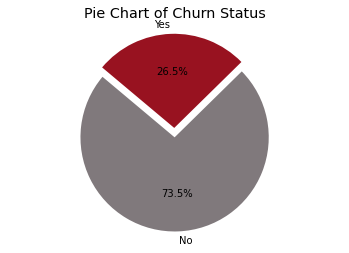

In [35]:
# Customize colors and other settings
colors = ['#80797c', '#981220']
explode = (0.1,0) # Explode 1st slice
# Create a pie chart
plt.pie(df_churn['count'], explode = explode, labels = df_churn['Churn'], 
        colors = colors, autopct = '%1.1f%%', shadow = False, startangle = 140)
# Add title
plt.title('Pie Chart of Churn Status')
plt.axis('equal')
plt.show()

In [36]:
# The composition of churn by payment method
df_churn_payment = df.groupby(['Churn', 'PaymentMethod']).agg({
    'customerID': 'count'
    }
).rename(columns = {'customerID': 'Total'}).reset_index().sort_values('Total', ascending = False)
# Replace the categories
df_churn_payment = df_churn_payment.replace(['Bank transfer (automatic)', 'Credit card (automatic)'], ['Bank transfer', 'Credit card'])

In [37]:
df_churn_payment

,Churn,PaymentMethod,Total
3,No,Mailed check,1304
2,No,Electronic check,1294
1,No,Credit card,1290
0,No,Bank transfer,1286
6,Yes,Electronic check,1071
7,Yes,Mailed check,308
4,Yes,Bank transfer,258
5,Yes,Credit card,232


/Users/leiyu/opt/anaconda3/lib/python3.9/site-packages/plotnine/layer.py:344: PlotnineWarning: position_stack : Removed 4 rows containing missing values.


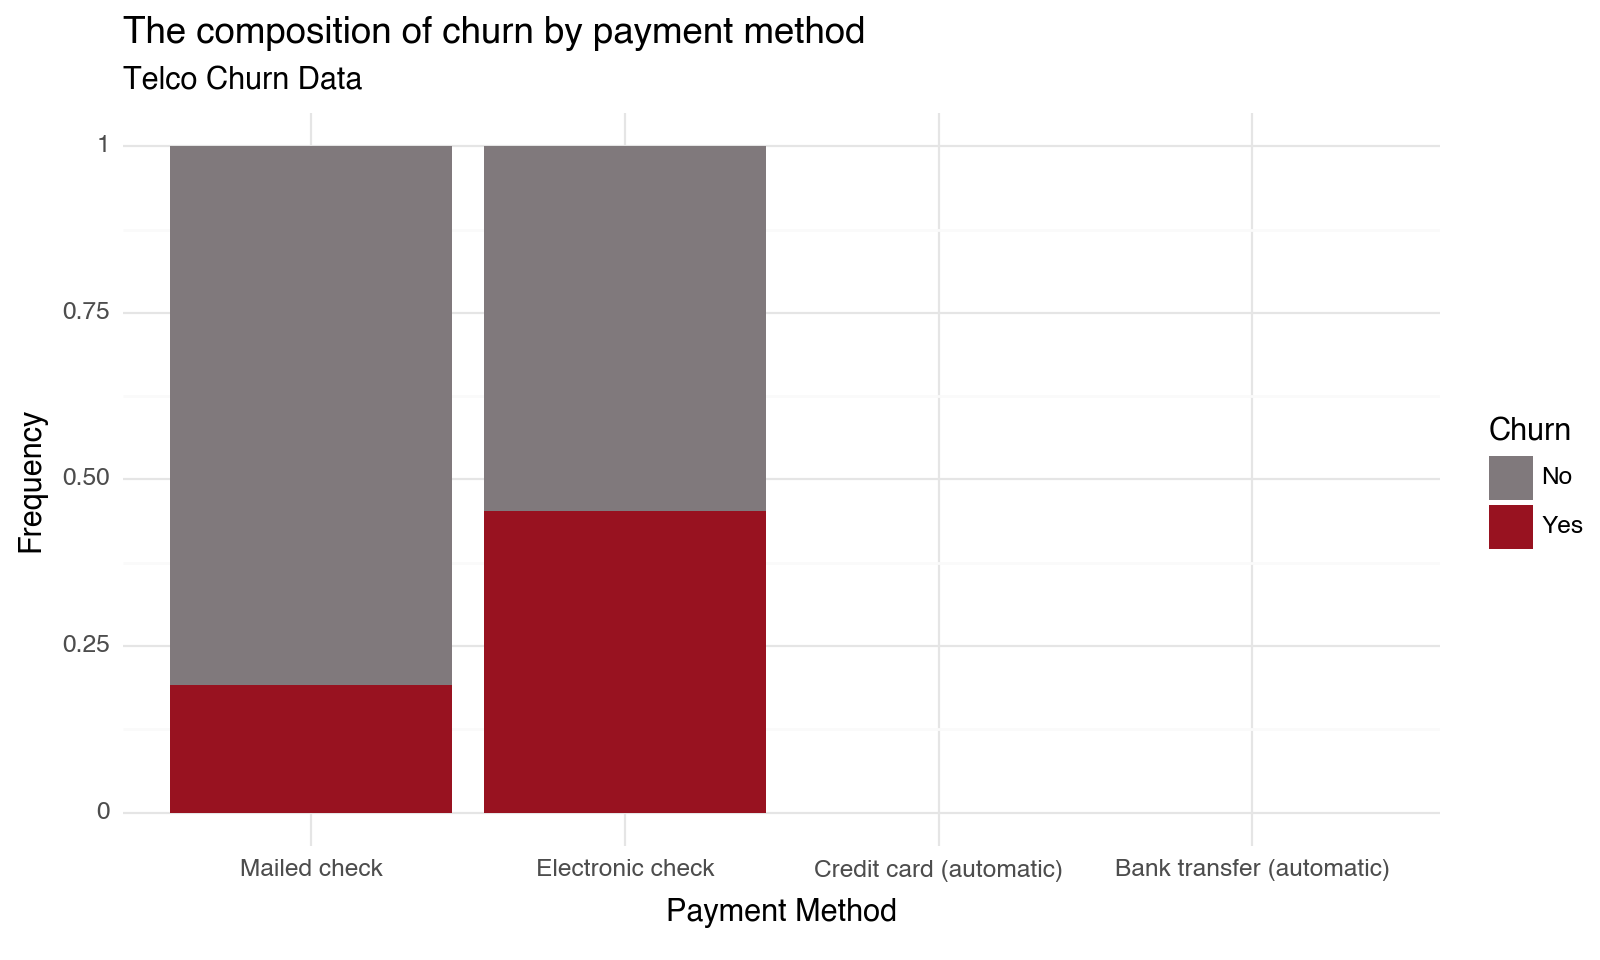

<Figure Size: (800 x 480)>

In [38]:
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_churn_payment)+
    geom_bar(aes(x = 'PaymentMethod',
                 y = 'Total',
                 fill = 'Churn'),
             stat = 'identity',
             position = 'fill')+
    labs(title = 'The composition of churn by payment method',
         subtitle = 'Telco Churn Data')+
    xlab('Payment Method')+
    ylab('Frequency')+
    scale_x_discrete(limits = ['Mailed check', 'Electronic check', 'Credit card (automatic)', 'Bank transfer (automatic)'])+
    scale_fill_manual(values = ['#80797c','#981220'], labels = ['No', 'Yes'])+
    theme_minimal()
)

In [39]:
# The composition of churn by payment method
df_churn_contract = df.groupby(['Churn', 'Contract']).agg({
    'customerID': 'count'
    }
).rename(columns = {'customerID': 'Total'}).reset_index().sort_values('Total', ascending = False)

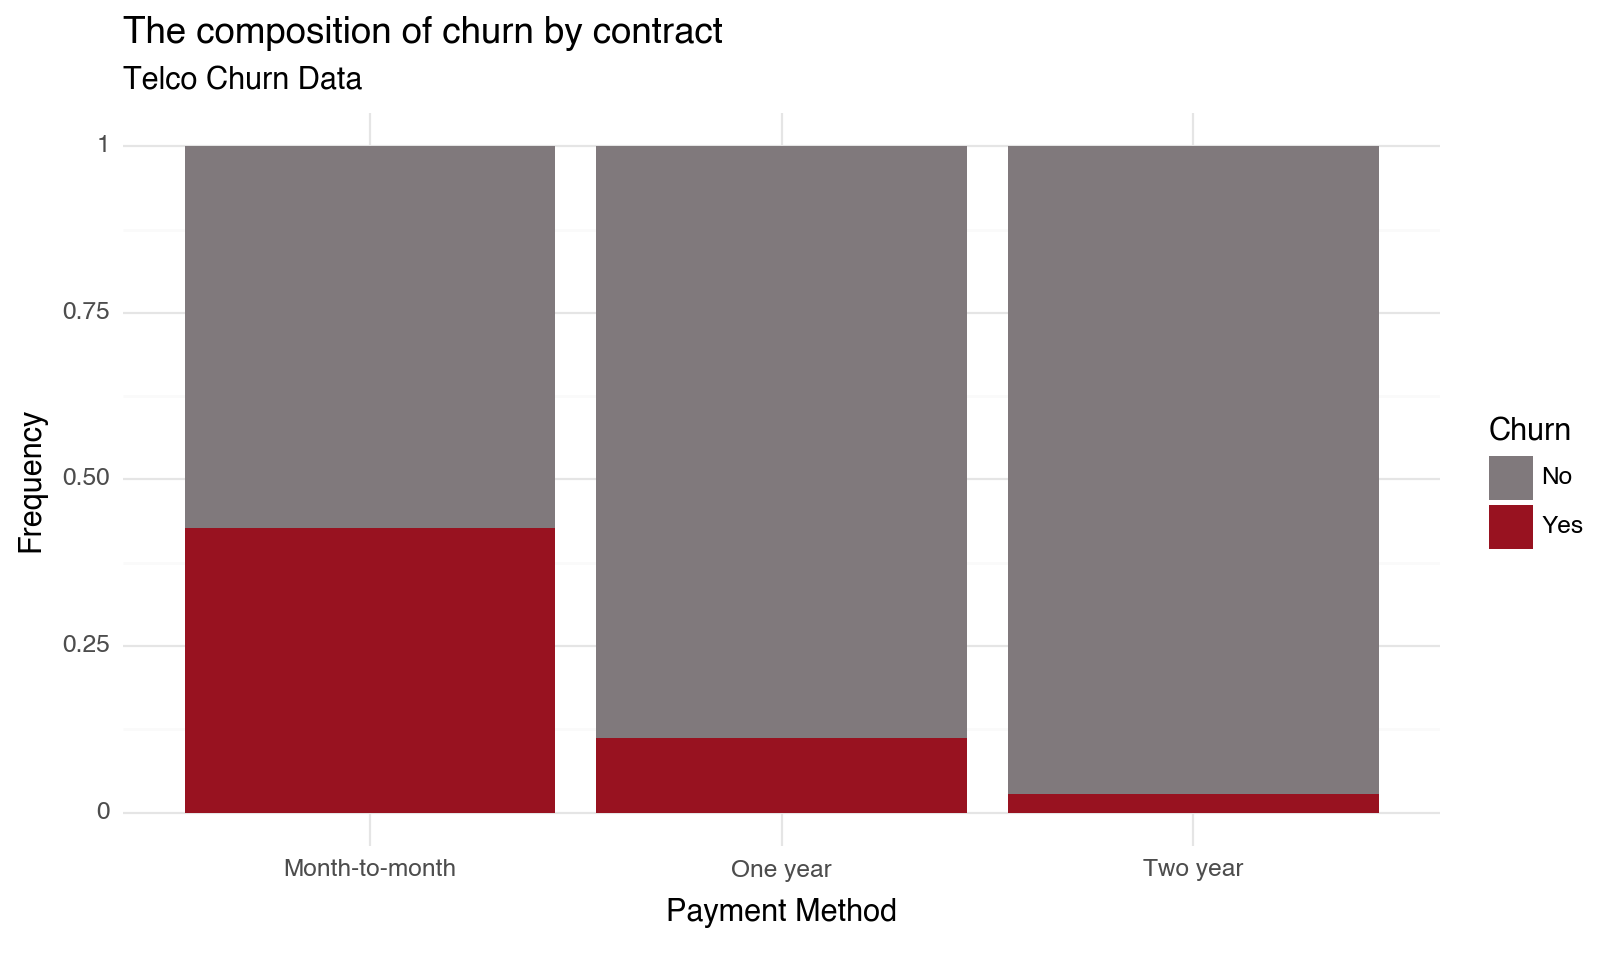

<Figure Size: (800 x 480)>

In [40]:
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_churn_contract)+
    geom_bar(aes(x = 'Contract',
                 y = 'Total',
                 fill = 'Churn'),
             stat = 'identity',
             position = 'fill')+
    labs(title = 'The composition of churn by contract',
         subtitle = 'Telco Churn Data')+
    xlab('Payment Method')+
    ylab('Frequency')+
    scale_x_discrete(limits = ['Month-to-month', 'One year', 'Two year'])+
    scale_fill_manual(values = ['#80797c','#981220'], labels = ['No', 'Yes'])+
    theme_minimal()
)

In [41]:
# Convert dataframe to matrix
dfMatrix = df_cat.loc[:, df_cat.columns != 'customerID'].to_numpy()

In [42]:
dfMatrix

array([['Female', 'No', 'Yes', ..., 'Yes', 'Electronic check', 'No'],
       ['Male', 'No', 'No', ..., 'No', 'Mailed check', 'No'],
       ['Male', 'No', 'No', ..., 'Yes', 'Mailed check', 'Yes'],
       ...,
       ['Female', 'No', 'Yes', ..., 'Yes', 'Electronic check', 'No'],
       ['Male', 'Yes', 'Yes', ..., 'Yes', 'Mailed check', 'Yes'],
       ['Male', 'No', 'No', ..., 'Yes', 'Bank transfer (automatic)',
        'No']], dtype=object)

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


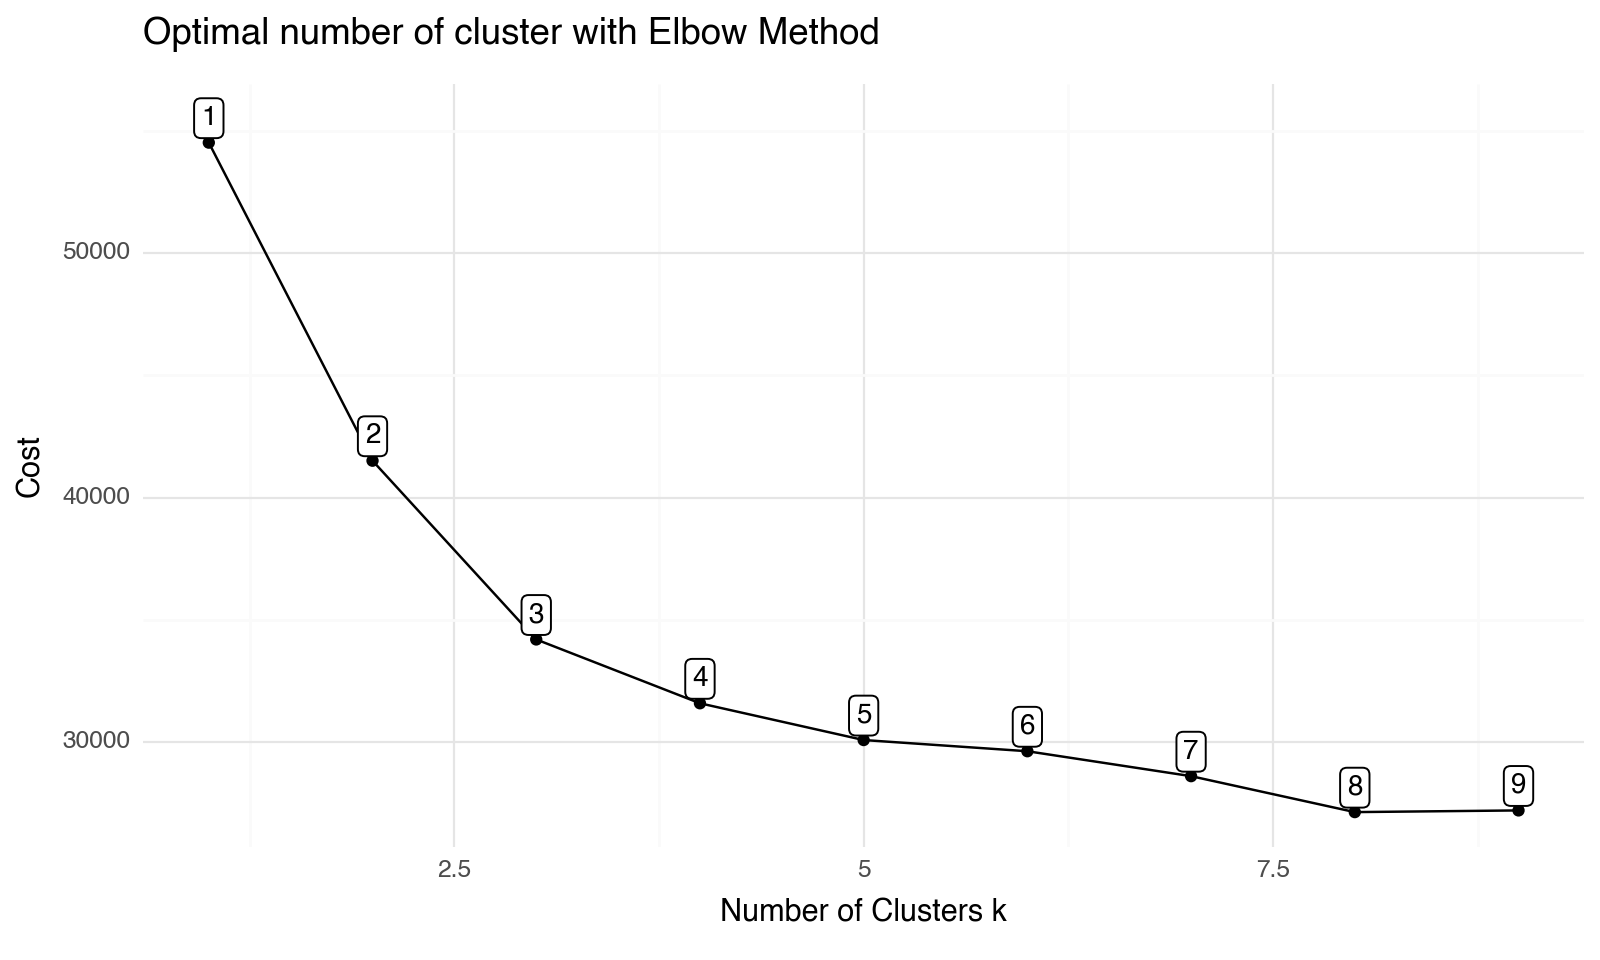

<Figure Size: (800 x 480)>

In [43]:
# Choosing optimal K
cost = []
for cluster in range(1, 10):
    try:
        kmodes = KModes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kmodes.fit_predict(dfMatrix)
        cost.append(kmodes.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster': range(1, 10), 'Cost': cost})
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [44]:
# Fit the cluster
kmodes = KModes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 0)
kmodes.fit_predict(dfMatrix)

array([2, 2, 2, ..., 2, 2, 0], dtype=uint16)

In [45]:
# Cluster centorid
kmodes.cluster_centroids_
# Check the iteration of the clusters created
kmodes.n_iter_
# Check the cost of the clusters created
kmodes.cost_

34192.0

In [46]:
# Add the cluster to the dataframe
df_cat['Cluster Labels'] = kmodes.labels_
df_cat['Segment'] = df_cat['Cluster Labels'].map({0:'First', 1:'Second', 2:'Third'})
# Order the cluster
df_cat['Segment'] = df_cat['Segment'].astype('category')
df_cat['Segment'] = df_cat['Segment'].cat.reorder_categories(['First', 'Second', 'Third'])

/var/folders/lj/sq_z3m_s3z51_g2s4qfv2hrw0000gn/T/ipykernel_88043/3433547490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/lj/sq_z3m_s3z51_g2s4qfv2hrw0000gn/T/ipykernel_88043/3433547490.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/lj/sq_z3m_s3z51_g2s4qfv2hrw0000gn/T/ipykernel_88043/3433547490.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [48]:
df_cat

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Cluster Labels,Segment
0,7590-VHVEG,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,2,Third
1,5575-GNVDE,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,2,Third
2,3668-QPYBK,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,2,Third
3,7795-CFOCW,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,2,Third
4,9237-HQITU,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,2,Third
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No,0,First
7039,2234-XADUH,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No,0,First
7040,4801-JZAZL,Female,No,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,2,Third
7041,8361-LTMKD,Male,Yes,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,2,Third


In [47]:
# Columns for centroids
list_col = ['customerID', 'Cluster Labels', 'Segment']
cols = [col for col in df_cat if col not in list_col]
# Create an index for cluster interpretation
index = ['First Cluster', 'Second Cluster', 'Third Cluster']
# Create the data frame
pd.DataFrame(kmodes.cluster_centroids_, columns = cols, index = index)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
First Cluster,Female,No,Yes,No,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),No
Second Cluster,Male,No,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,No
Third Cluster,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
